# 第十五课 MultiCollinearity In Linear Regression多重共线性及VIF 


Python零基础学习：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

源文件下载链接: https://pan.baidu.com/s/1yuNlG6u9_C31fzhzbzqASA 提取码: ebrh

Multicollinearity refers to a situation in which two or more explanatory variables in a multiple regression model are highly linearly related. We have perfect multicollinearity if, for example as in the equation above, the correlation between two independent variables is equal to 1 or −1.

Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results

Variance Inflation Factor (VIF)








In [252]:
# Import necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [253]:
df=pd.read_csv('Lesson15-Salary_Data.csv')

In [254]:
df

,Sex,Age,YearsExperience,Salary
0,0,24,1.1,39343
1,1,25,1.3,46205
2,0,24,1.5,37731
3,1,25,2.0,43525
4,0,25,2.2,39891
5,1,26,2.9,56642
6,0,27,3.0,60150
7,1,26,3.2,54445
8,1,27,3.2,64445
9,1,27,3.7,57189


In [255]:
df.head()

,Sex,Age,YearsExperience,Salary
0,0,24,1.1,39343
1,1,25,1.3,46205
2,0,24,1.5,37731
3,1,25,2.0,43525
4,0,25,2.2,39891


In [256]:
df.corr()

,Sex,Age,YearsExperience,Salary
Sex,1.000000,0.050028,0.066731,0.045346
Age,0.050028,1.000000,0.994212,0.982714
YearsExperience,0.066731,0.994212,1.000000,0.978242
Salary,0.045346,0.982714,0.978242,1.000000


In [257]:
X=X1=df.iloc[:,:-1]
y=df.iloc[:,-1]

### 第一种方式：使用.corr()

In [258]:
X.corr()

,Sex,Age,YearsExperience
Sex,1.000000,0.050028,0.066731
Age,0.050028,1.000000,0.994212
YearsExperience,0.066731,0.994212,1.000000


### 第二种方式：使用pairplot

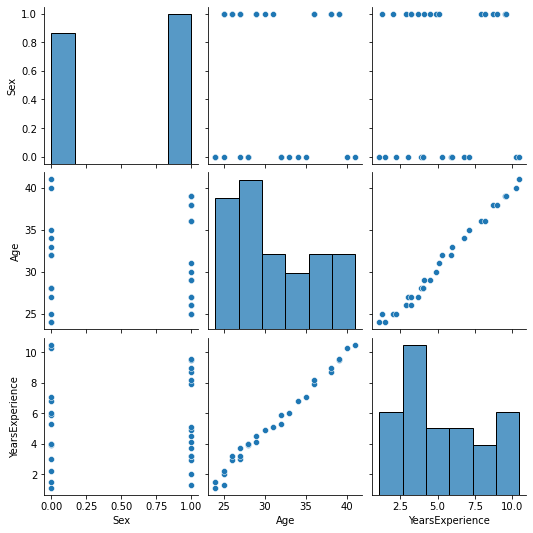

In [259]:
sns.pairplot(X)

### 第三种方式：使用VIF（必须使用）

In [136]:
#pip install statsmodels
#conda install -c conda-forge statsmodels

In [226]:
# Import library for VIF (方差扩大因子)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [260]:
X

,Sex,Age,YearsExperience
0,0,24,1.1
1,1,25,1.3
2,0,24,1.5
3,1,25,2.0
4,0,25,2.2
5,1,26,2.9
6,0,27,3.0
7,1,26,3.2
8,1,27,3.2
9,1,27,3.7


In [262]:
variance_inflation_factor(X.values, 0)

2.1349098210011803

In [263]:
variance_inflation_factor(X.values, 1)

12.138592602889707

In [264]:
variance_inflation_factor(X.values, 2)

10.367631468765076

In [265]:
X.columns

Index(['Sex', 'Age', 'YearsExperience'], dtype='object')

In [266]:
X.values

array([[ 0. , 24. ,  1.1],
       [ 1. , 25. ,  1.3],
       [ 0. , 24. ,  1.5],
       [ 1. , 25. ,  2. ],
       [ 0. , 25. ,  2.2],
       [ 1. , 26. ,  2.9],
       [ 0. , 27. ,  3. ],
       [ 1. , 26. ,  3.2],
       [ 1. , 27. ,  3.2],
       [ 1. , 27. ,  3.7],
       [ 0. , 28. ,  3.9],
       [ 0. , 28. ,  4. ],
       [ 0. , 28. ,  4. ],
       [ 1. , 29. ,  4.1],
       [ 1. , 29. ,  4.5],
       [ 1. , 30. ,  4.9],
       [ 1. , 31. ,  5.1],
       [ 0. , 32. ,  5.3],
       [ 0. , 32. ,  5.9],
       [ 0. , 33. ,  6. ],
       [ 0. , 34. ,  6.8],
       [ 0. , 35. ,  7.1],
       [ 1. , 36. ,  7.9],
       [ 1. , 36. ,  8.2],
       [ 1. , 38. ,  8.7],
       [ 1. , 38. ,  9. ],
       [ 1. , 39. ,  9.5],
       [ 1. , 39. ,  9.6],
       [ 0. , 40. , 10.3],
       [ 0. , 41. , 10.5]])

In [267]:
X.shape[1]

3

In [268]:
range(X.shape[1])

range(0, 3)

In [269]:
vif(X)

,variables,VIF
0,Sex,2.134910
1,Age,12.138593
2,YearsExperience,10.367631


VIF starts at 1 and has no upper limit

VIF = 1, no correlation between the independent variable and the other variables

VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others


In [270]:
X

,Sex,Age,YearsExperience
0,0,24,1.1
1,1,25,1.3
2,0,24,1.5
3,1,25,2.0
4,0,25,2.2
5,1,26,2.9
6,0,27,3.0
7,1,26,3.2
8,1,27,3.2
9,1,27,3.7


In [271]:
X=X.drop('Age',axis=1)

In [272]:
X

,Sex,YearsExperience
0,0,1.1
1,1,1.3
2,0,1.5
3,1,2.0
4,0,2.2
5,1,2.9
6,0,3.0
7,1,3.2
8,1,3.2
9,1,3.7


In [273]:
vif(X)

,variables,VIF
0,Sex,1.804751
1,YearsExperience,1.804751


### 第四种方式：使用statsmodels.regression.linear_model.OLS Ordinary Least Squares最小二乘法(又称最小平方法)

In [274]:
X1

,Sex,Age,YearsExperience
0,0,24,1.1
1,1,25,1.3
2,0,24,1.5
3,1,25,2.0
4,0,25,2.2
5,1,26,2.9
6,0,27,3.0
7,1,26,3.2
8,1,27,3.2
9,1,27,3.7


In [275]:
X2=sm.add_constant(X1)

In [276]:
X2

,const,Sex,Age,YearsExperience
0,1.0,0,24,1.1
1,1.0,1,25,1.3
2,1.0,0,24,1.5
3,1.0,1,25,2.0
4,1.0,0,25,2.2
5,1.0,1,26,2.9
6,1.0,0,27,3.0
7,1.0,1,26,3.2
8,1.0,1,27,3.2
9,1.0,1,27,3.7


In [277]:
model=sm.OLS(y,X2).fit() #Ordinary Least Squares最小二乘法(又称最小平方法)

In [278]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     245.4
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           3.49e-19
Time:                        21:35:09   Log-Likelihood:                -297.95
No. Observations:                  30   AIC:                             603.9
Df Residuals:                      26   BIC:                             609.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6.833e+04   3.72e+04     -1.838      0.078   -1.45e+05    8094.672
Sex              -311.4461   1984.473     -0.157      0.877   -4390.590    3767.697
Age              4463.4461   1750.353      2.550      0.017     865.544    8061.348
YearsExperience  1098.8909   3298.652      0.333      0.742   -5681.586    7879.368
==============================================================================
Omnibus:                        1.673   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.433   Jarque-Bera (JB):                1.020
Skew:                           0.451   Prob(JB):                        0.601
Kurtosis:                       3.058   Cond. No.                     1.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [280]:
from sklearn.datasets import load_boston

In [281]:
boston=load_boston()

In [282]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

### Bunch is a subclass of the Dict class and supports all the methods as dict does. In addition, it allows you to use the keys as attributes.

In [283]:
type(boston)

sklearn.utils.Bunch

In [284]:
X=pd.DataFrame(boston['data'])

In [285]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [286]:
X.columns=boston['feature_names']

In [287]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [288]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


### 第五种方式：sns.heatmap

<AxesSubplot:>

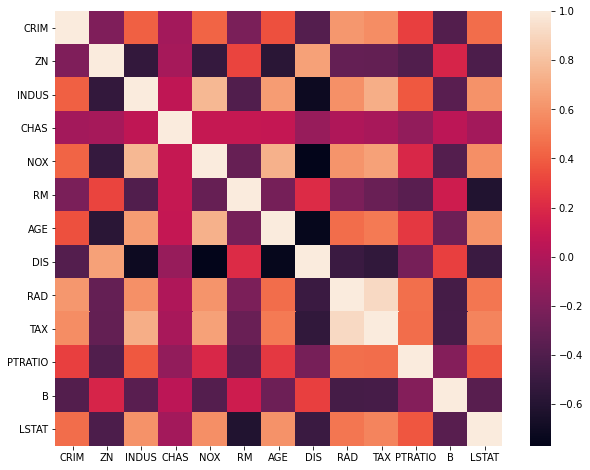

In [289]:
plt.figure(figsize = (10,8))
sns.heatmap(X.corr())

In [290]:
vif(X)

,variables,VIF
0,CRIM,2.100373
1,ZN,2.844013
2,INDUS,14.485758
3,CHAS,1.152952
4,NOX,73.894947
5,RM,77.948283
6,AGE,21.386850
7,DIS,14.699652
8,RAD,15.167725
9,TAX,61.227274


In [291]:
vif(X.drop('PTRATIO',axis=1))

,variables,VIF
0,CRIM,2.099345
1,ZN,2.451624
2,INDUS,14.275283
3,CHAS,1.142167
4,NOX,73.894171
5,RM,60.598846
6,AGE,21.361234
7,DIS,12.221605
8,RAD,15.159162
9,TAX,59.301541


In [292]:
vif(X)

,variables,VIF
0,CRIM,2.100373
1,ZN,2.844013
2,INDUS,14.485758
3,CHAS,1.152952
4,NOX,73.894947
5,RM,77.948283
6,AGE,21.386850
7,DIS,14.699652
8,RAD,15.167725
9,TAX,61.227274


In [293]:
X=X.drop('PTRATIO',axis=1)

In [294]:
vif(X)

,variables,VIF
0,CRIM,2.099345
1,ZN,2.451624
2,INDUS,14.275283
3,CHAS,1.142167
4,NOX,73.894171
5,RM,60.598846
6,AGE,21.361234
7,DIS,12.221605
8,RAD,15.159162
9,TAX,59.301541


In [198]:
vif(X.drop('NOX',axis=1))

,variables,VIF
0,CRIM,2.097537
1,ZN,2.449661
2,INDUS,13.150904
3,CHAS,1.138277
4,RM,41.406746
5,AGE,19.889623
6,DIS,12.032952
7,RAD,15.155012
8,TAX,57.720347
9,B,18.396072


In [295]:
X=X.drop('NOX',axis=1)

In [296]:
X=X.drop('RM',axis=1)

In [297]:
vif(X)

,variables,VIF
0,CRIM,2.095375
1,ZN,2.432618
2,INDUS,13.149180
3,CHAS,1.131756
4,AGE,14.795487
5,DIS,9.234022
6,RAD,15.045607
7,TAX,54.461654
8,B,14.233397
9,LSTAT,8.396362


In [299]:
X=X.drop('TAX',axis=1)

In [300]:
vif(X)

,variables,VIF
0,CRIM,2.095211
1,ZN,2.313889
2,INDUS,8.205465
3,CHAS,1.106350
4,DIS,8.209371
5,RAD,4.689836
6,B,10.074224
7,LSTAT,6.856889


In [301]:
X=X.drop('B',axis=1)

In [302]:
vif(X)

,variables,VIF
0,CRIM,2.067135
1,ZN,2.299351
2,INDUS,6.900077
3,CHAS,1.086574
4,DIS,3.968908
5,RAD,4.678181
6,LSTAT,6.726973


In [303]:
#X=X.drop('B',axis=1)

In [304]:
vif(X)

,variables,VIF
0,CRIM,2.067135
1,ZN,2.299351
2,INDUS,6.900077
3,CHAS,1.086574
4,DIS,3.968908
5,RAD,4.678181
6,LSTAT,6.726973


#VIF should be below 4. That is analogous to having R^2 value less than .75

variance inflation factor

Interpreting the Variance Inflation Factor
Variance inflation factors range from 1 upwards. The numerical value for VIF tells you (in decimal form) what percentage the variance (i.e. the standard error squared) is inflated for each coefficient. For example, a VIF of 1.9 tells you that the variance of a particular coefficient is 90% bigger than what you would expect if there was no multicollinearity — if there was no correlation with other predictors.
A rule of thumb for interpreting the variance inflation factor:

1 = not correlated.
Between 1 and 5 = moderately correlated.
Greater than 5 = highly correlated.

In [305]:
X=X.drop('LSTAT',axis=1)

In [306]:
vif(X)

,variables,VIF
0,CRIM,1.977574
1,ZN,2.249163
2,INDUS,4.357839
3,CHAS,1.082837
4,DIS,3.367351
5,RAD,4.632245


### 第六种方式 Understanding Data -- the most important

In [217]:
#such as cloumn C,F